## Downloading Dataset from Kaggle and Import Python Packages

/* Introduction about project and source link to the dataset*/

In [2]:
# install kaggle api
!pip install kaggle

In [3]:
!pip install opendatasets

In [56]:
import opendatasets as od
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import seaborn as sns

In [5]:
# download dataset to local
od.download ("https://www.kaggle.com/jp797498e/twitter-entity-sentiment-analysis?select=twitter_training.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zzyy24
Your Kaggle Key: ········


  0%|          | 0.00/1.99M [00:00<?, ?B/s]

100%|██████████| 1.99M/1.99M [00:03<00:00, 561kB/s]

In [10]:
# return dataset to current file
os.listdir()

['.ipynb_checkpoints',
 'EuropeanSoccerDatabase.zip',
 'Homework_1_Guide.ipynb',
 'Homework_2_Guide.ipynb',
 'Project Selection',
 'Project Selection Report.ipynb',
 'Project Selection.ipynb',
 'twitter-entity-sentiment-analysis',
 'W1_1_introduction.pdf',
 'W1_2.ipynb',
 'W1_2_environment_setting_python_basics_1.pdf',
 'W2_1.ipynb',
 'W2_1_python_basics_2.pdf',
 'W3_1.ipynb',
 'W3_1_python_basics_3.pdf',
 'W3_2.ipynb',
 'W3_2_data_management.pdf',
 'W3_3.ipynb',
 'W3_3_numpy_python.pdf',
 'W4_1.ipynb',
 'W4_1_pandas_python.pdf']

## Process and Clean the data

/* read data (read__csv) from Pandas package/
/* Check if the data has header/ - using list()
/* I found there's no header so I use headerList to add headers, then I use .to_csv() function to convert the original csv file to the new file which has headers and name it 'twitter_validation2.csv'. From here, we have our dataframe which we name it twitter_df */


In [14]:
twitter = pd.read_csv ('twitter-entity-sentiment-analysis/twitter_validation.csv')
twitter


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [17]:
# Get the header of the dataset

list_of_column_names = list(twitter.columns)
print('List of column names: ', list_of_column_names)

List of column names:  ['3364', 'Facebook', 'Irrelevant', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']


In [47]:
# Add hearders to the dataset for future work

#Adding header
headerList = ['id', 'theme', 'sentiment', 'content']

# Converting dataframe to csv
twitter.to_csv('twitter-entity-sentiment-analysis/twitter_validation2.csv', header = headerList, index = False)

# Display modified file
twitter_df = pd.read_csv('twitter-entity-sentiment-analysis/twitter_validation2.csv')
twitter_df

,id,theme,sentiment,content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


## Descriptions and Initial Statistics of Datasets

In [54]:
#file name, data types, and summary statistics

#file name
print('twitter_validation2.csv')

#data types
print('Data Types: ', twitter_df.dtypes)
print('\n')

# Summary Statistics
print('Summary Statistics: ', twitter_df.describe())
print('\n')


twitter_validation2.csv
Data Types:  id            int64
theme        object
sentiment    object
content      object
dtype: object


Summary Statistics:                   id
count    999.000000
mean    6435.159159
std     3728.912226
min        6.000000
25%     3241.500000
50%     6560.000000
75%     9662.500000
max    13197.000000




## Visualization (Histogram)


<function matplotlib.pyplot.show(*args, **kw)>

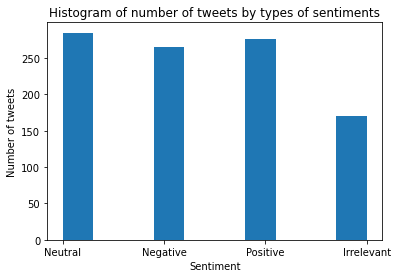

In [22]:
# creat a basic histogram by sentiment
plt.hist (twitter_df['sentiment']
         )
# set title and labels
plt.xlabel ('Sentiment')
plt.ylabel('Number of tweets')
plt.title('Histogram of number of tweets by types of sentiments')
plt.show

### Visualization (Scatterplot)

In [61]:
print(twitter_df['theme'])

0                   Amazon
1                Microsoft
2                    CS-GO
3                   Google
4                     FIFA
              ...         
994    GrandTheftAuto(GTA)
995                  CS-GO
996            Borderlands
997              Microsoft
998        johnson&johnson
Name: theme, Length: 999, dtype: object


In [117]:
amazon = twitter_df[twitter_df.theme == 'Amazon']
amazon

,id,theme,sentiment,content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
42,316,Amazon,Neutral,Amazon stops accepting new online grocery cust...
74,171,Amazon,Irrelevant,AOC you make some very ignorant comments\nWhen...
116,96,Amazon,Positive,Seeing Amazon Prime marketing Borat by getting...
152,122,Amazon,Neutral,I didn't have massive success in #IndieApril b...
212,115,Amazon,Negative,Plague of Corruption is #1 on Amazon and # 3 o...
232,319,Amazon,Irrelevant,AWESOME !! BONECAKES...with strawberries and ...
323,127,Amazon,Neutral,"""Great storytelling, peppered with detail that..."
412,13,Amazon,Positive,Hated packing this one but at least it sold an...
430,345,Amazon,Neutral,A Bigram Poem inspired by WileyEd:\n Amazon Pe...


### Visualization (network)

In [27]:
# Read our EdgeList

twitter_nx_graph = nx.from_pandas_edgelist(twitter_df, source = 'sentiment', target = 'theme')

In [28]:
type(twitter_nx_graph)

networkx.classes.graph.Graph

In [29]:
# Info
nx.info (twitter_nx_graph)

'Name: \nType: Graph\nNumber of nodes: 36\nNumber of edges: 126\nAverage degree:   7.0000'

In [30]:
# Check All nodes anes
twitter_nx_graph.nodes()

NodeView(('Neutral', 'Amazon', 'Negative', 'Microsoft', 'CS-GO', 'Google', 'FIFA', 'Positive', 'MaddenNFL', 'TomClancysRainbowSix', 'AssassinsCreed', 'CallOfDuty', 'Dota2', 'Verizon', 'NBA2K', 'Nvidia', 'GrandTheftAuto(GTA)', 'RedDeadRedemption(RDR)', 'Hearthstone', 'Irrelevant', 'ApexLegends', 'Overwatch', 'PlayerUnknownsBattlegrounds(PUBG)', 'Borderlands', 'PlayStation5(PS5)', 'johnson&johnson', 'Fortnite', 'Xbox(Xseries)', 'CallOfDutyBlackopsColdWar', 'Facebook', 'HomeDepot', 'Cyberpunk2077', 'TomClancysGhostRecon', 'WorldOfCraft', 'LeagueOfLegends', 'Battlefield'))

In [31]:
len(twitter_nx_graph.nodes())

36

In [33]:
# Check all edges
twitter_nx_graph.edges()

EdgeView([('Neutral', 'Amazon'), ('Neutral', 'Google'), ('Neutral', 'CS-GO'), ('Neutral', 'Hearthstone'), ('Neutral', 'ApexLegends'), ('Neutral', 'Nvidia'), ('Neutral', 'CallOfDuty'), ('Neutral', 'RedDeadRedemption(RDR)'), ('Neutral', 'TomClancysRainbowSix'), ('Neutral', 'Overwatch'), ('Neutral', 'Xbox(Xseries)'), ('Neutral', 'johnson&johnson'), ('Neutral', 'CallOfDutyBlackopsColdWar'), ('Neutral', 'Microsoft'), ('Neutral', 'WorldOfCraft'), ('Neutral', 'TomClancysGhostRecon'), ('Neutral', 'Facebook'), ('Neutral', 'Verizon'), ('Neutral', 'PlayerUnknownsBattlegrounds(PUBG)'), ('Neutral', 'GrandTheftAuto(GTA)'), ('Neutral', 'Dota2'), ('Neutral', 'Borderlands'), ('Neutral', 'LeagueOfLegends'), ('Neutral', 'FIFA'), ('Neutral', 'HomeDepot'), ('Neutral', 'Battlefield'), ('Neutral', 'NBA2K'), ('Neutral', 'AssassinsCreed'), ('Neutral', 'PlayStation5(PS5)'), ('Neutral', 'Fortnite'), ('Neutral', 'MaddenNFL'), ('Neutral', 'Cyberpunk2077'), ('Amazon', 'Irrelevant'), ('Amazon', 'Positive'), ('Amazon

In [34]:
len(twitter_nx_graph.edges())

126

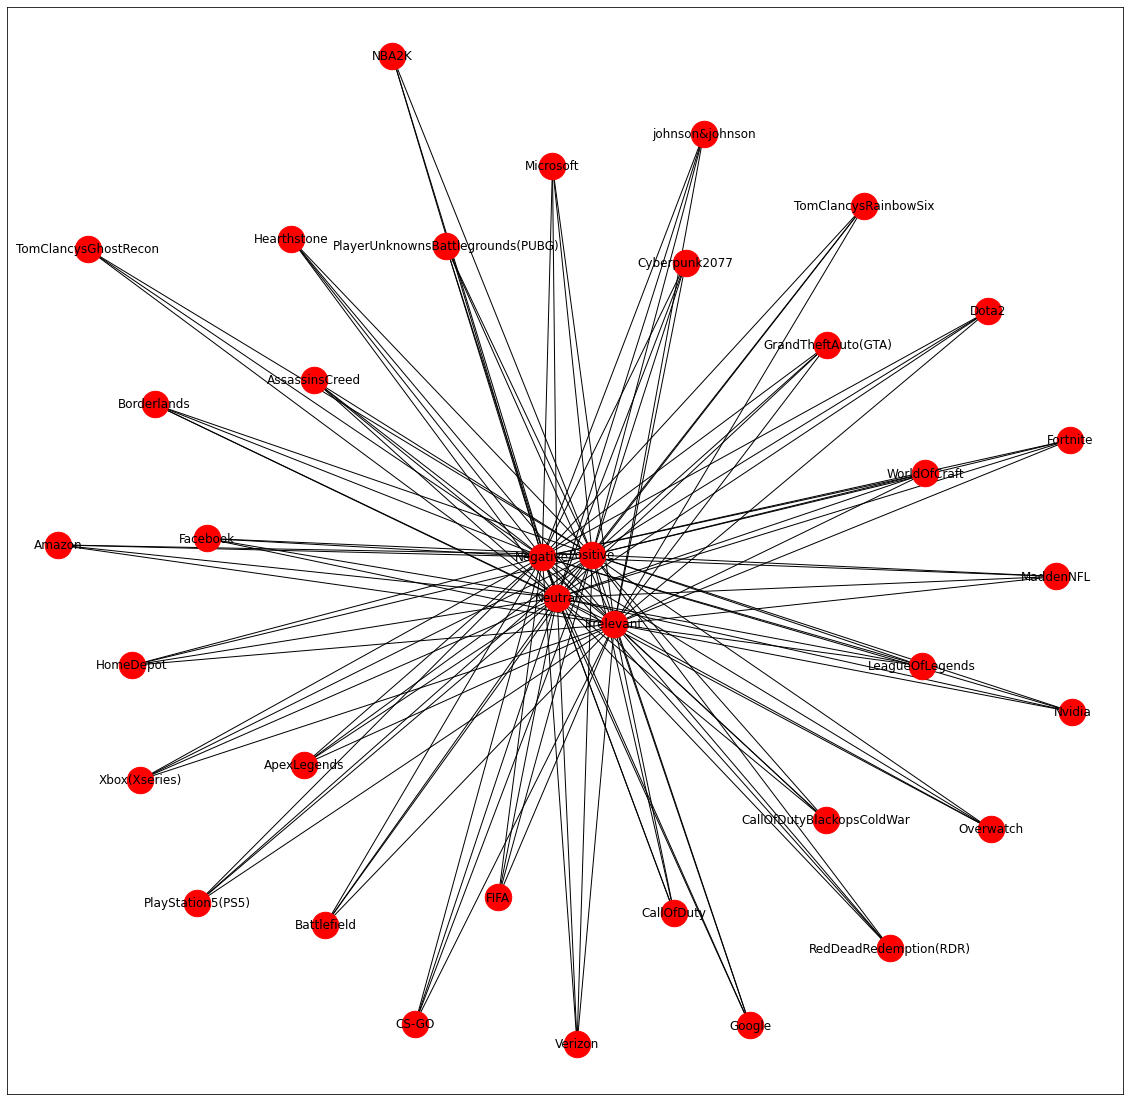

In [46]:
# Visualization using networkx

#nx.draw_networkx
plt.figure(figsize = (20,20))
nx.draw_networkx(twitter_nx_graph, with_labels = True, node_size = 700, node_color = 'r')

